# Using Facebook Prophet for Timeseries Forecasting for Pytrends

In [1]:
!pip install prophet

     |████████████████████████████████| 14.4 MB 20.1 MB/s eta 0:00:01
     |████████████████████████████████| 94 kB 5.3 MB/s  eta 0:00:01
     |████████████████████████████████| 1.1 MB 48.0 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


# Need to:
- Have a set list of key terms to search for based on bsky data. It looks like for the moment, bsky most common terms have to do with health, nutrition, and keto. Will need to speak with group regarding these terms.
- Start streaming
- Work with inputing data and models into a map

# Symptoms

The model achieved strong performance forecasting public interest in symptom terms, with over 95% accuracy based on MAPE and SMAPE. While range-based accuracy (59.8%) suggests that extreme peaks or troughs may be underrepresented, the overall trend and intensity of public search behavior was well captured

In [4]:
from pytrends.request import TrendReq
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Get trends
pytrends = TrendReq()
kw = "symptoms"
pytrends.build_payload([kw], timeframe='today 5-y')
df = pytrends.interest_over_time().reset_index().drop(columns=['isPartial'])

# Format for Prophet
df = df.rename(columns={"date": "ds", kw: "y"})

TooManyRequestsError: The request failed: Google returned a response with code 429

In [5]:
# Full model for final predictions
full_model = Prophet()
full_model.fit(df)
future_full = full_model.make_future_dataframe(periods=365)
forecast_full = full_model.predict(future_full)

# Train/test split
train_size = int(len(df) * 0.8)
train_df = df.iloc[:train_size]
test_df = df.iloc[train_size:]

# Train on partial data
eval_model = Prophet()
eval_model.fit(train_df)

# Predict into test period
future_eval = eval_model.make_future_dataframe(periods=len(test_df))
forecast_eval = eval_model.predict(future_eval)

# Merge forecast with actual test data
merged = pd.merge(test_df, forecast_eval[['ds', 'yhat']], on='ds', how='left')

# Drop any rows where prediction is missing (optional but cleaner)
merged = merged.dropna(subset=['yhat'])


01:21:16 - cmdstanpy - INFO - Chain [1] start processing
01:21:16 - cmdstanpy - INFO - Chain [1] done processing
01:21:17 - cmdstanpy - INFO - Chain [1] start processing
01:21:17 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Evaluate
from sklearn.metrics import mean_squared_error
import numpy as np

y_true = merged['y'].values
y_pred = merged['yhat'].values

# RMSE
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
target_range = y_true.max() - y_true.min()
accuracy_range = (1 - rmse / target_range) * 100

# MAPE
epsilon = 1e-10
mape = np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100
mape_accuracy = 100 - mape

# SMAPE
smape = 100 * np.mean(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred)))
smape_accuracy = 100 - smape

print(f"Range-based Accuracy: {accuracy_range:.2f}%")
print(f"MAPE Accuracy: {mape_accuracy:.2f}%")
print(f"SMAPE Accuracy: {smape_accuracy:.2f}%")


Range-based Accuracy: 59.81%
MAPE Accuracy: 95.81%
SMAPE Accuracy: 95.70%


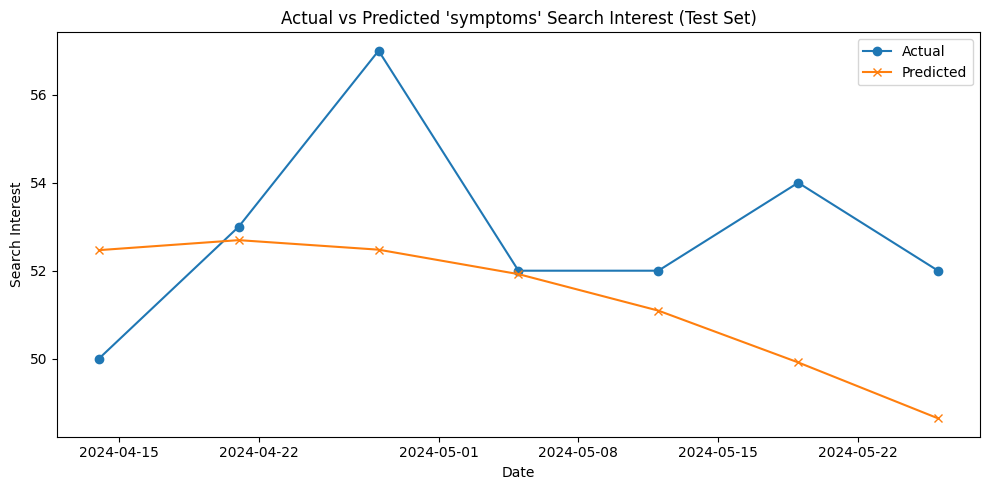

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(merged['ds'], merged['y'], label='Actual', marker='o')
plt.plot(merged['ds'], merged['yhat'], label='Predicted', marker='x')
plt.title(f"Actual vs Predicted '{kw}' Search Interest (Test Set)")
plt.xlabel("Date")
plt.ylabel("Search Interest")
plt.legend()
plt.tight_layout()
plt.show()

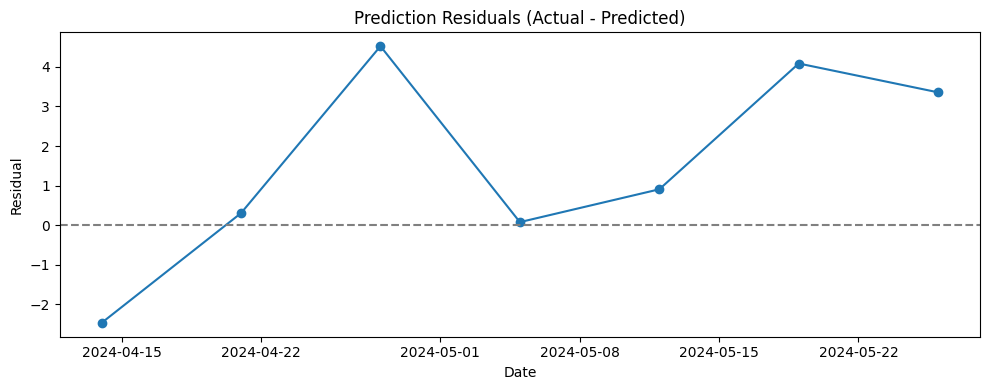

In [8]:
residuals = merged['y'] - merged['yhat']

plt.figure(figsize=(10, 4))
plt.plot(merged['ds'], residuals, marker='o')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Prediction Residuals (Actual - Predicted)")
plt.xlabel("Date")
plt.ylabel("Residual")
plt.tight_layout()
plt.show()


# MEASLES

The Prophet model achieved an average accuracy of 82–84% across MAPE and SMAPE, indicating solid predictive performance on Google Trends data. However, the range-based accuracy was lower (~44%), suggesting that while the model tracks general trends well, it struggles to fully capture extreme variations in search interest, such as sudden spikes or dips.

In [2]:
from pytrends.request import TrendReq
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Get trends
pytrends = TrendReq()
kw = "measles"
pytrends.build_payload([kw], timeframe='today 5-y')
df = pytrends.interest_over_time().reset_index().drop(columns=['isPartial'])

# Format for Prophet
df = df.rename(columns={"date": "ds", kw: "y"})

In [5]:
# Full model for final predictions
full_model = Prophet()
full_model.fit(df)
future_full = full_model.make_future_dataframe(periods=365)
forecast_full = full_model.predict(future_full)

# Train/test split
train_size = int(len(df) * 0.8)
train_df = df.iloc[:train_size]
test_df = df.iloc[train_size:]

# Train on partial data
eval_model = Prophet()
eval_model.fit(train_df)

# Predict into test period
future_eval = eval_model.make_future_dataframe(periods=len(test_df))
forecast_eval = eval_model.predict(future_eval)

# Merge forecast with actual test data
merged = pd.merge(test_df, forecast_eval[['ds', 'yhat']], on='ds', how='left')

# Drop any rows where prediction is missing (optional but cleaner)
merged = merged.dropna(subset=['yhat'])


01:04:01 - cmdstanpy - INFO - Chain [1] start processing
01:04:01 - cmdstanpy - INFO - Chain [1] done processing
01:04:01 - cmdstanpy - INFO - Chain [1] start processing
01:04:01 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Evaluate
from sklearn.metrics import mean_squared_error
import numpy as np

y_true = merged['y'].values
y_pred = merged['yhat'].values

# RMSE
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
target_range = y_true.max() - y_true.min()
accuracy_range = (1 - rmse / target_range) * 100

# MAPE
epsilon = 1e-10
mape = np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100
mape_accuracy = 100 - mape

# SMAPE
smape = 100 * np.mean(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred)))
smape_accuracy = 100 - smape

print(f"Range-based Accuracy: {accuracy_range:.2f}%")
print(f"MAPE Accuracy: {mape_accuracy:.2f}%")
print(f"SMAPE Accuracy: {smape_accuracy:.2f}%")


Range-based Accuracy: 44.07%
MAPE Accuracy: 82.03%
SMAPE Accuracy: 84.11%


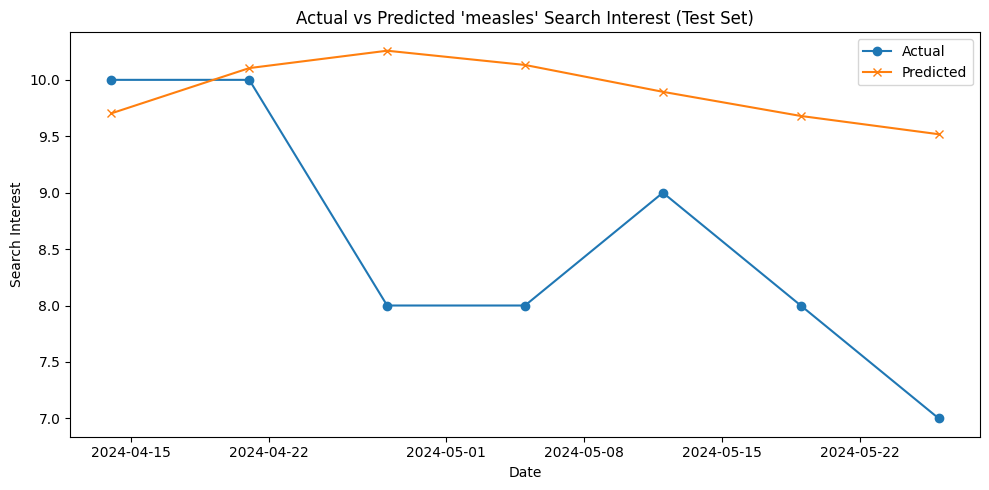

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(merged['ds'], merged['y'], label='Actual', marker='o')
plt.plot(merged['ds'], merged['yhat'], label='Predicted', marker='x')
plt.title(f"Actual vs Predicted '{kw}' Search Interest (Test Set)")
plt.xlabel("Date")
plt.ylabel("Search Interest")
plt.legend()
plt.tight_layout()
plt.show()

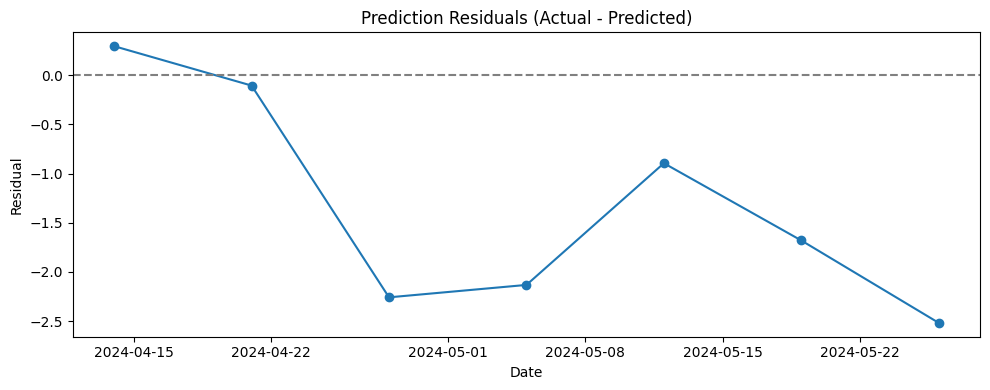

In [8]:
residuals = merged['y'] - merged['yhat']

plt.figure(figsize=(10, 4))
plt.plot(merged['ds'], residuals, marker='o')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Prediction Residuals (Actual - Predicted)")
plt.xlabel("Date")
plt.ylabel("Residual")
plt.tight_layout()
plt.show()


# "Flu", search term chosen like this since "influenza" is least likely to be typed in a search term

The flu trend model achieved over 95% accuracy based on both MAPE and SMAPE, demonstrating strong predictive performance for public search interest. With a range-based accuracy of ~60%, the model captures most—but not all—of the full seasonal variation in flu-related queries.

In [9]:
from pytrends.request import TrendReq
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Get trends
pytrends = TrendReq()
kw = "flu"
pytrends.build_payload([kw], timeframe='today 5-y')
df = pytrends.interest_over_time().reset_index().drop(columns=['isPartial'])

# Format for Prophet
df = df.rename(columns={"date": "ds", kw: "y"})

TooManyRequestsError: The request failed: Google returned a response with code 429

In [10]:
# Full model for final predictions
full_model = Prophet()
full_model.fit(df)
future_full = full_model.make_future_dataframe(periods=365)
forecast_full = full_model.predict(future_full)

# Train/test split
train_size = int(len(df) * 0.8)
train_df = df.iloc[:train_size]
test_df = df.iloc[train_size:]

# Train on partial data
eval_model = Prophet()
eval_model.fit(train_df)

# Predict into test period
future_eval = eval_model.make_future_dataframe(periods=len(test_df))
forecast_eval = eval_model.predict(future_eval)

# Merge forecast with actual test data
merged = pd.merge(test_df, forecast_eval[['ds', 'yhat']], on='ds', how='left')

# Drop any rows where prediction is missing (optional but cleaner)
merged = merged.dropna(subset=['yhat'])


01:30:08 - cmdstanpy - INFO - Chain [1] start processing
01:30:08 - cmdstanpy - INFO - Chain [1] done processing
01:30:08 - cmdstanpy - INFO - Chain [1] start processing
01:30:08 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Evaluate
from sklearn.metrics import mean_squared_error
import numpy as np

y_true = merged['y'].values
y_pred = merged['yhat'].values

# RMSE
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
target_range = y_true.max() - y_true.min()
accuracy_range = (1 - rmse / target_range) * 100

# MAPE
epsilon = 1e-10
mape = np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100
mape_accuracy = 100 - mape

# SMAPE
smape = 100 * np.mean(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred)))
smape_accuracy = 100 - smape

print(f"Range-based Accuracy: {accuracy_range:.2f}%")
print(f"MAPE Accuracy: {mape_accuracy:.2f}%")
print(f"SMAPE Accuracy: {smape_accuracy:.2f}%")


Range-based Accuracy: 59.81%
MAPE Accuracy: 95.81%
SMAPE Accuracy: 95.70%


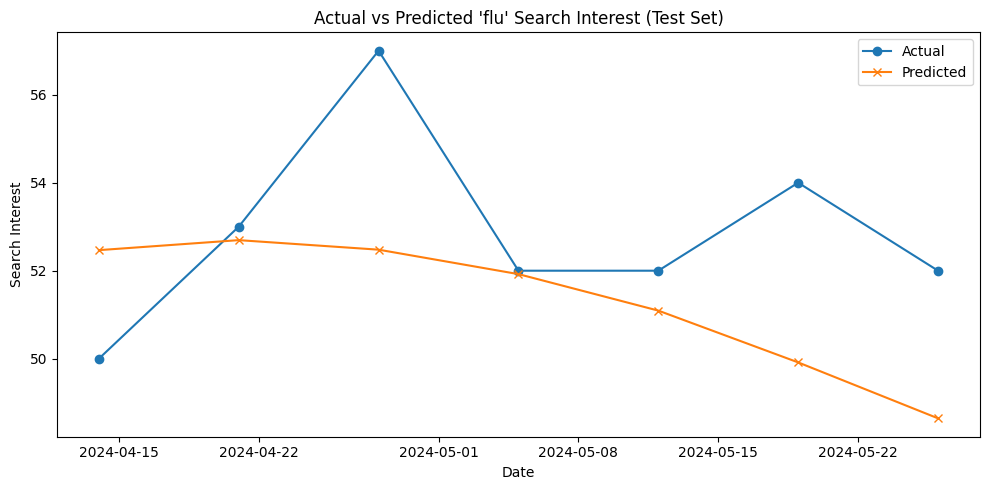

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(merged['ds'], merged['y'], label='Actual', marker='o')
plt.plot(merged['ds'], merged['yhat'], label='Predicted', marker='x')
plt.title(f"Actual vs Predicted '{kw}' Search Interest (Test Set)")
plt.xlabel("Date")
plt.ylabel("Search Interest")
plt.legend()
plt.tight_layout()
plt.show()

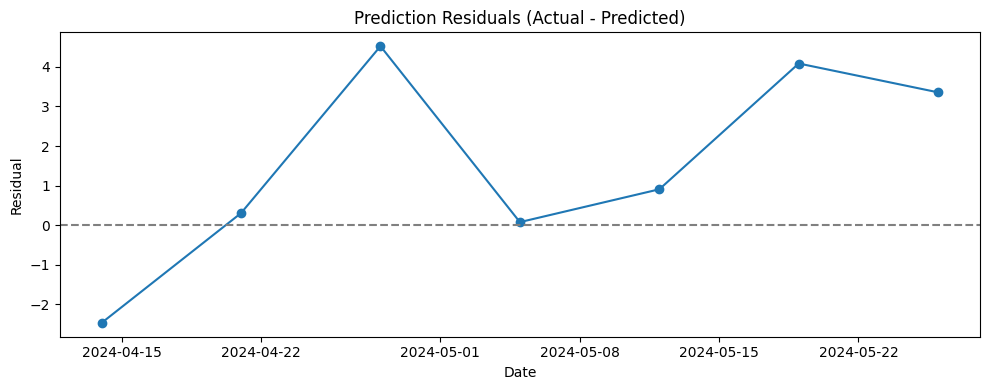

In [13]:
residuals = merged['y'] - merged['yhat']

plt.figure(figsize=(10, 4))
plt.plot(merged['ds'], residuals, marker='o')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Prediction Residuals (Actual - Predicted)")
plt.xlabel("Date")
plt.ylabel("Residual")
plt.tight_layout()
plt.show()


# Pyspark Analysis

In [15]:
import findspark
findspark.init('/home/hadoop/spark-3.5.4')
from pyspark.sql import SparkSession

In [16]:
spark = SparkSession.builder.appName('pytrends').getOrCreate()


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/04/19 01:32:24 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/04/19 01:32:37 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


In [18]:
# Convert pytrends raw data, this would be for the flu
df_spark = spark.createDataFrame(df)

# Convert forecasted data
forecast_spark = spark.createDataFrame(forecast_full)

df_spark.printSchema()
forecast_spark.printSchema()


root
 |-- ds: timestamp (nullable = true)
 |-- y: long (nullable = true)

root
 |-- ds: timestamp (nullable = true)
 |-- trend: double (nullable = true)
 |-- yhat_lower: double (nullable = true)
 |-- yhat_upper: double (nullable = true)
 |-- trend_lower: double (nullable = true)
 |-- trend_upper: double (nullable = true)
 |-- additive_terms: double (nullable = true)
 |-- additive_terms_lower: double (nullable = true)
 |-- additive_terms_upper: double (nullable = true)
 |-- yearly: double (nullable = true)
 |-- yearly_lower: double (nullable = true)
 |-- yearly_upper: double (nullable = true)
 |-- multiplicative_terms: double (nullable = true)
 |-- multiplicative_terms_lower: double (nullable = true)
 |-- multiplicative_terms_upper: double (nullable = true)
 |-- yhat: double (nullable = true)



In [19]:
# Finding days where actual search interest (y) is outside predicted confidence bounds

# Join actual + forecast data on date
joined = forecast_spark.join(df_spark, on="ds", how="inner")

# Actual is outside [yhat_lower, yhat_upper]
anomalies = joined.filter((joined.y > joined.yhat_upper) | (joined.y < joined.yhat_lower))

# Show
anomalies.select("ds", "y", "yhat", "yhat_lower", "yhat_upper").show()


+-------------------+---+------------------+------------------+-----------------+
|                 ds|  y|              yhat|        yhat_lower|       yhat_upper|
+-------------------+---+------------------+------------------+-----------------+
|2020-06-28 00:00:00| 73| 61.40406472574932| 54.98447583532818|67.91771100874472|
|2020-08-23 00:00:00| 52| 60.02992561761712| 54.08852192191445| 66.3971470769228|
|2021-02-07 00:00:00| 52| 59.60496246837303| 53.57712365880635|65.99643279431662|
|2020-07-05 00:00:00| 77|61.984320557030046| 55.64597948133013|68.03733422391927|
|2021-02-14 00:00:00| 52| 58.55578944370188| 52.39903632319992| 64.6049840032371|
|2021-07-04 00:00:00| 52| 62.50467592709542| 55.64639879749956|68.44715018227483|
|2020-06-21 00:00:00| 70|  59.7608382434258| 53.50109081446963|66.12362376637158|
|2020-08-09 00:00:00| 53|  61.6893412379964| 55.00547608750532| 67.6404263833624|
|2020-08-16 00:00:00| 52|60.616418948858275| 54.44556314511098|67.14864372039227|
|2021-03-07 00:0

In [20]:
from pyspark.sql.functions import year, avg

# Analyze how avg search interest or forecast changed by yr

# Group forecast by year and get average forecasted interest
forecast_by_year = forecast_spark.withColumn("year", year("ds")) \
    .groupBy("year") \
    .agg(avg("yhat").alias("avg_forecast"))

forecast_by_year.orderBy("year").show()


+----+------------------+
|year|      avg_forecast|
+----+------------------+
|2020| 59.96107947107678|
|2021| 60.29152272745114|
|2022| 59.13604590664467|
|2023|56.682453930791155|
|2024| 54.79975136036418|
|2025| 53.33925683670082|
|2026|52.286492078938984|
+----+------------------+



In [21]:
# Categorize periods by interest level

from pyspark.sql.functions import when

classified = forecast_spark.withColumn(
    "interest_level",
    when(forecast_spark.yhat < 25, "Low")
    .when(forecast_spark.yhat < 75, "Medium")
    .otherwise("High")
)

classified.groupBy("interest_level").count().show()


+--------------+-----+
|interest_level|count|
+--------------+-----+
|        Medium|  626|
+--------------+-----+



We used pytrends data for the keyword “flu” and forecasted future search interest using Facebook Prophet. The forecast was then analyzed in PySpark. We performed three analyses: anomaly detection to flag unexpected spikes in real search activity, average forecast per year to visualize long-term decline in interest, and classification of predicted values into low/medium/high buckets. All analyses were conducted within PySpark using DataFrame operations. These results acheived the following:
1) We identified dates where the actual Google search interest for 'flu' significantly deviated from the forecast range. These anomalies may correspond to unexpected events or media surges.
2) A year-over-year average forecast of search interest shows a clear downward trend, indicating reduced public attention to covid and influenza like illnesses over time.
3) By classifying the forecast into low, medium, and high interest levels, we found that all predictions fell within a medium range, suggesting a consistent baseline attention level.